In [77]:
source('./data_processing.R')


In [44]:
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# region A

In [78]:
input_dir = './GiRAFR_outputs/Replogle_Cell/sample1/'
output_dir = './figures_results/Replogle_Cell/sample1'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 12528"
[1] "Wildtype UMI: 240156"
[1] "Mutant UMI: 1697572"


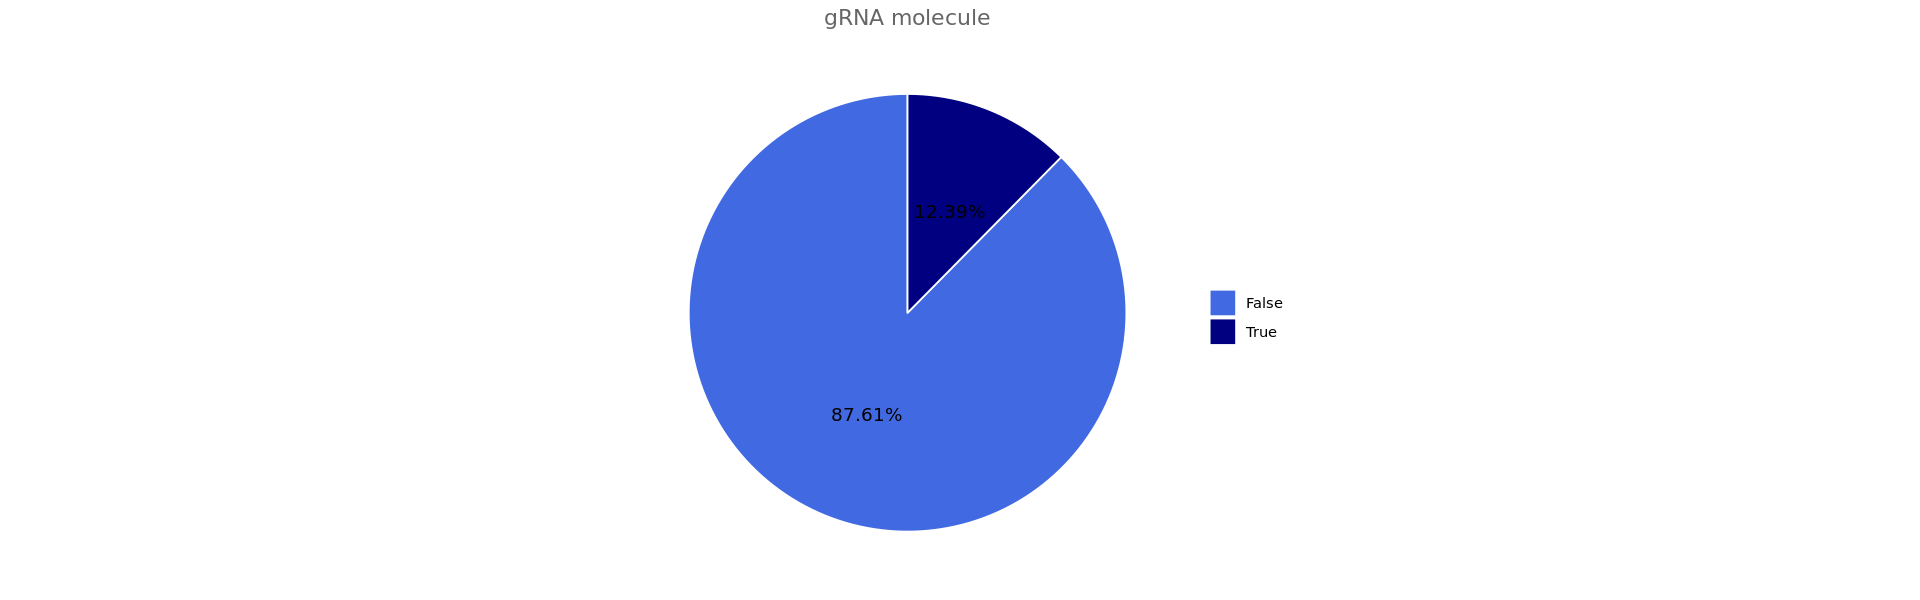

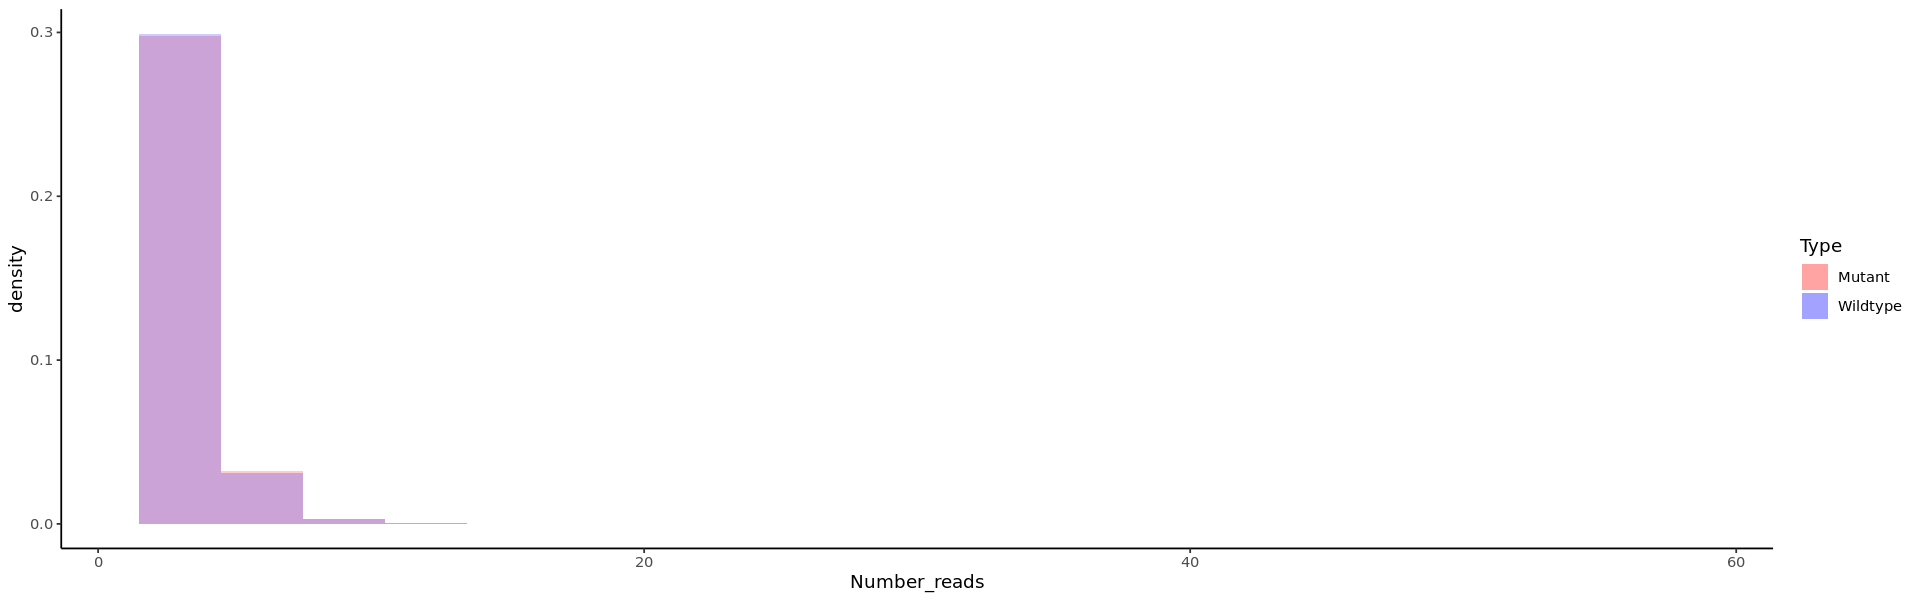

In [79]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


In [80]:
tmp <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False' 
                            & !grepl('TSO',gRNA_UMI_variant$Mutation)),]
tmp <- tmp[!grepl('gRNA:0', tmp$Mutation),]
nrow(tmp) # Real Mutant UMIs
nrow(gRNA_UMI_variant) - nrow(tmp) # wildtype UMIs

[1] 116687

[1] 1821041

### source of mutation

In [6]:
#consensus.count.matrix <- source_mutation(input_dir)

### MT.txt

[1] "MT mutation table"

    A     C  D(1) D(10) D(12) D(13)  D(2)  D(3)  D(4)  D(5)  D(6)  D(7)  D(8) 
  879   743   311     7     6     5   206   135    40    20     8     6     6 
 D(9)     G  I(1) I(10)  I(2)  I(3)  I(4)  I(5)  I(9)     T 
    3   923  2724     1   312    39    18     6     1   772 
[1] "MT mutation type"

   D    I    S 
 753 3101 3317 
[1] "MT mutation structure"

gRNA Rest  TSO 
3778  463 2930 


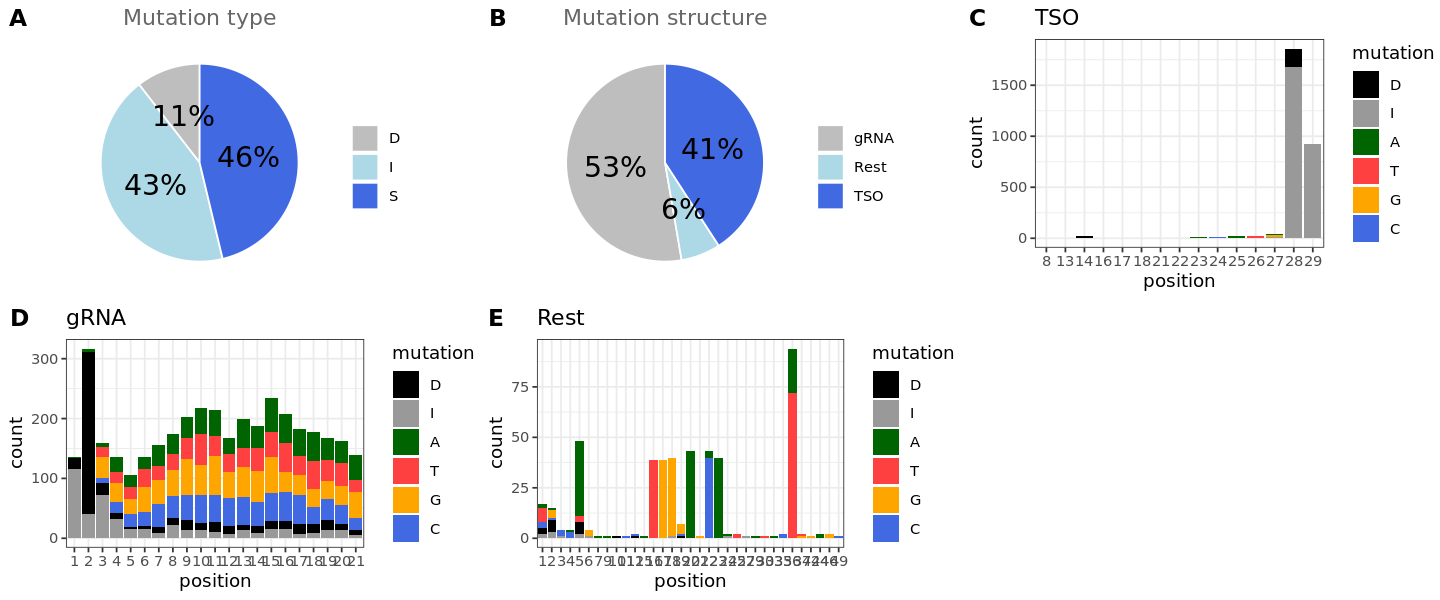

In [55]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [47]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.855   1.000  11.000 

Warning message:
“Removed 105 rows containing non-finite values (stat_count).”


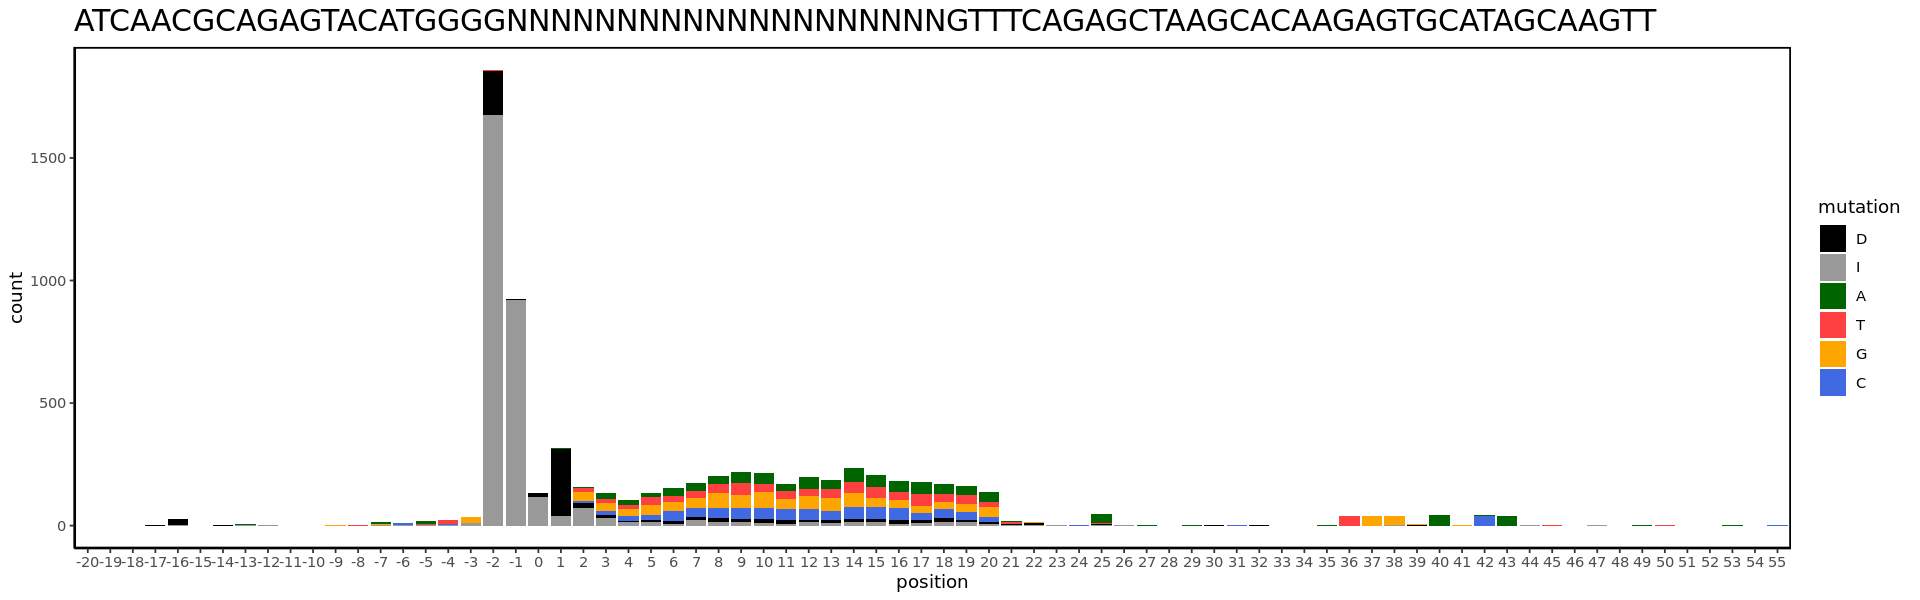

In [56]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')
#dev.off()

## TSO correction

In [63]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 105 rows containing non-finite values (stat_count).”


png 
  2

In [60]:
head(MT2[which(MT2$position == 1),])

,gene name,structure,structure length,position,mutation,variant number,MT_type,mutation2
,<chr>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<fct>
39,7833_SF3A2_P1_ENSG00000104897_A_gene,gRNA,21,1,D(2),7833_SF3A2_P1_ENSG00000104897_A_gene_variant_1,D,D
46,3471_GOLT1B_P1P2_ENSG00000111711_A_gene,gRNA,21,1,D(2),3471_GOLT1B_P1P2_ENSG00000111711_A_gene_variant_4,D,D
50,5551_NDUFB10_P1P2_ENSG00000140990_A_gene,gRNA,21,1,D(3),5551_NDUFB10_P1P2_ENSG00000140990_A_gene_variant_2,D,D
60,8415_SRP54_P1P2_ENSG00000100883_A_gene,gRNA,21,1,D(3),8415_SRP54_P1P2_ENSG00000100883_A_gene_variant_6,D,D
77,8216_SNRNP200_P1P2_ENSG00000144028_A_gene,gRNA,21,1,D(2),8216_SNRNP200_P1P2_ENSG00000144028_A_gene_variant_4,D,D
78,1148_CACTIN_P1P2_ENSG00000105298_A_gene,gRNA,21,1,D(2),1148_CACTIN_P1P2_ENSG00000105298_A_gene_variant_5,D,D


Caused by many sgRNAs with multiple G, then it will cause deletions when bind together with TSO

### Cell assignment

**Dual sgRNAs => cannot directly use this results**

Rows: 12659 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


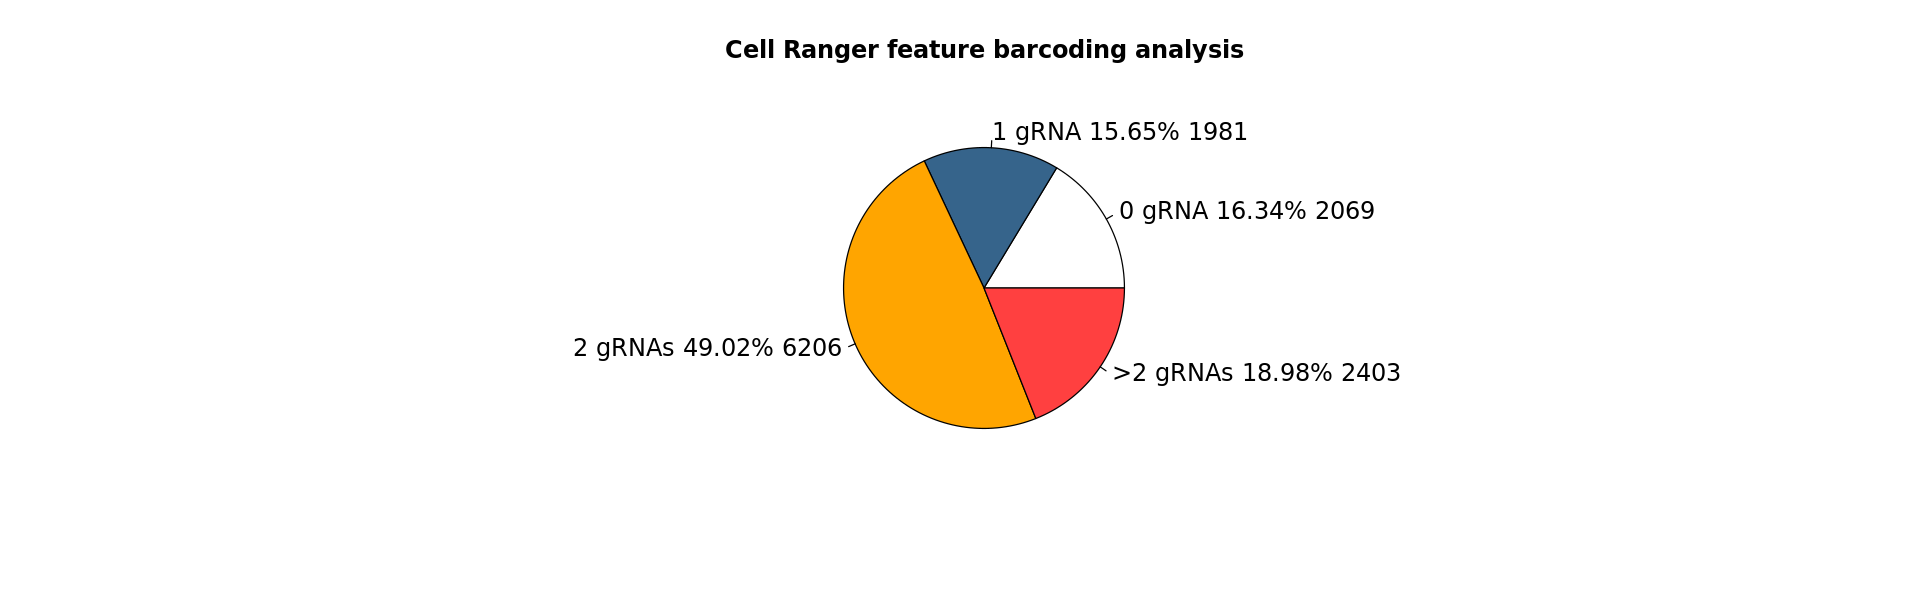

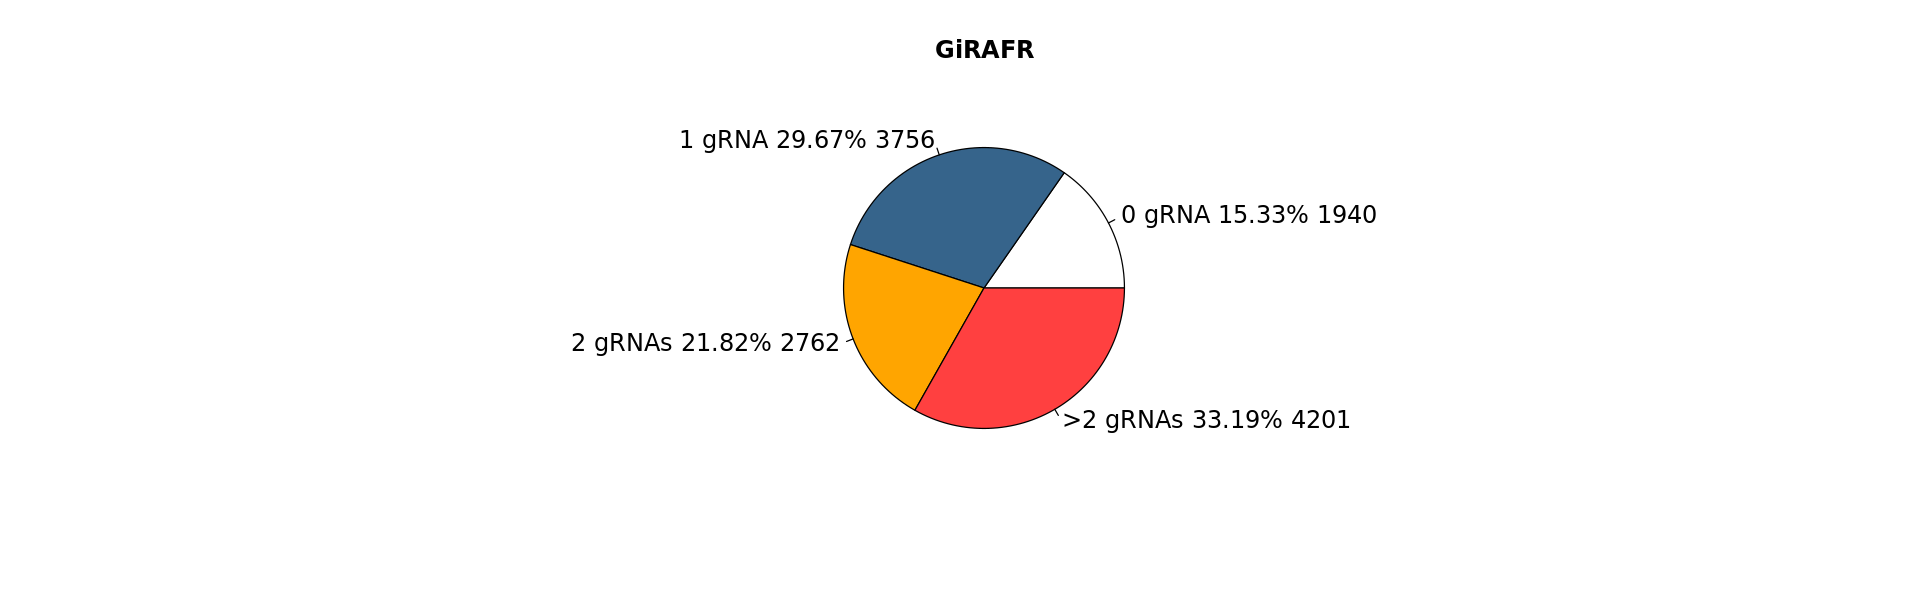

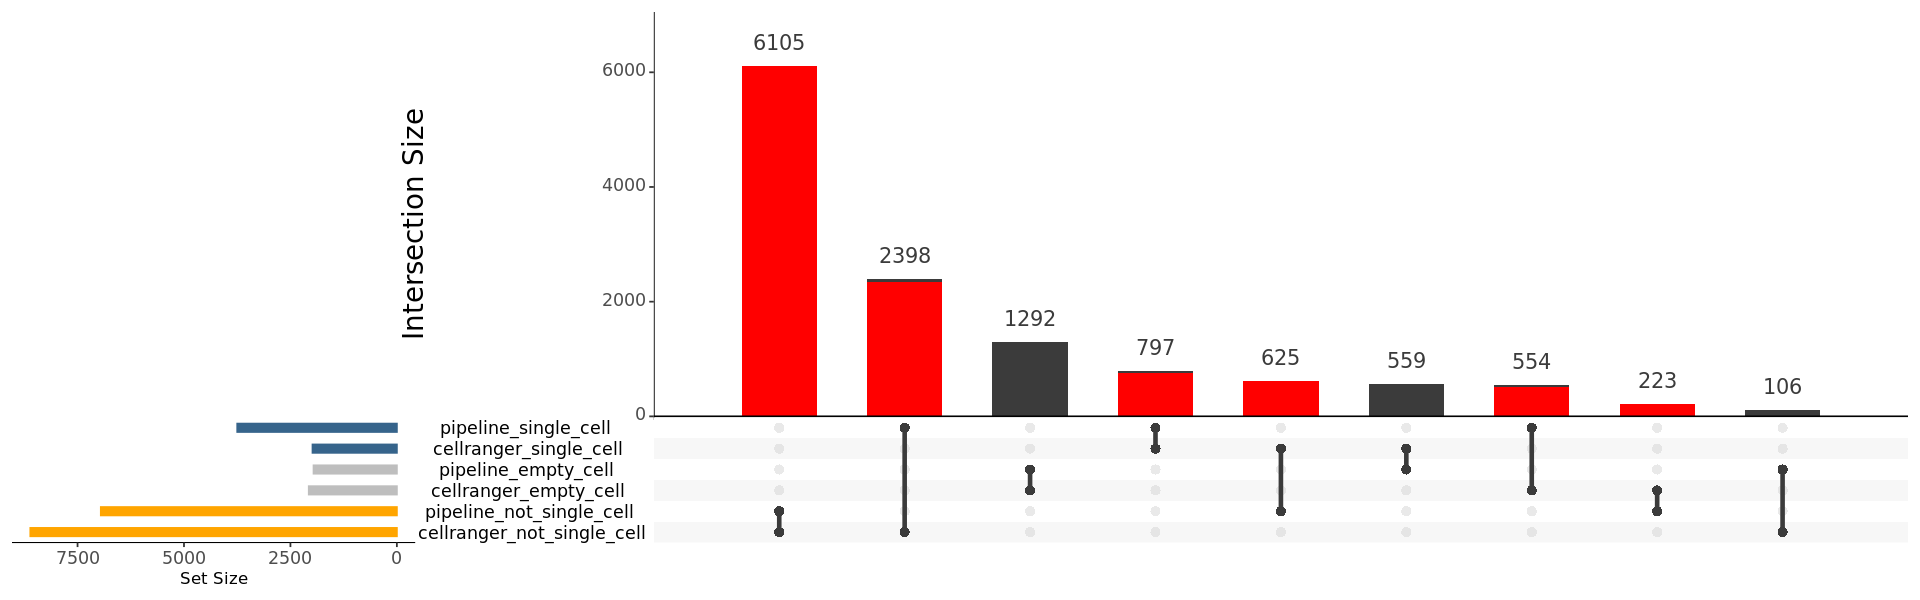

In [11]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Replogle_Cell//feature_barcoding_analysis/KD6_lane_1/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Replogle_Cell//feature_barcoding_analysis/KD6_lane_1//outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


# region B

In [81]:
input_dir = './GiRAFR_outputs/Replogle_Cell/sample2/'
output_dir = './figures_results/Replogle_Cell/sample2'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 12151"
[1] "Wildtype UMI: 269303"
[1] "Mutant UMI: 554321"


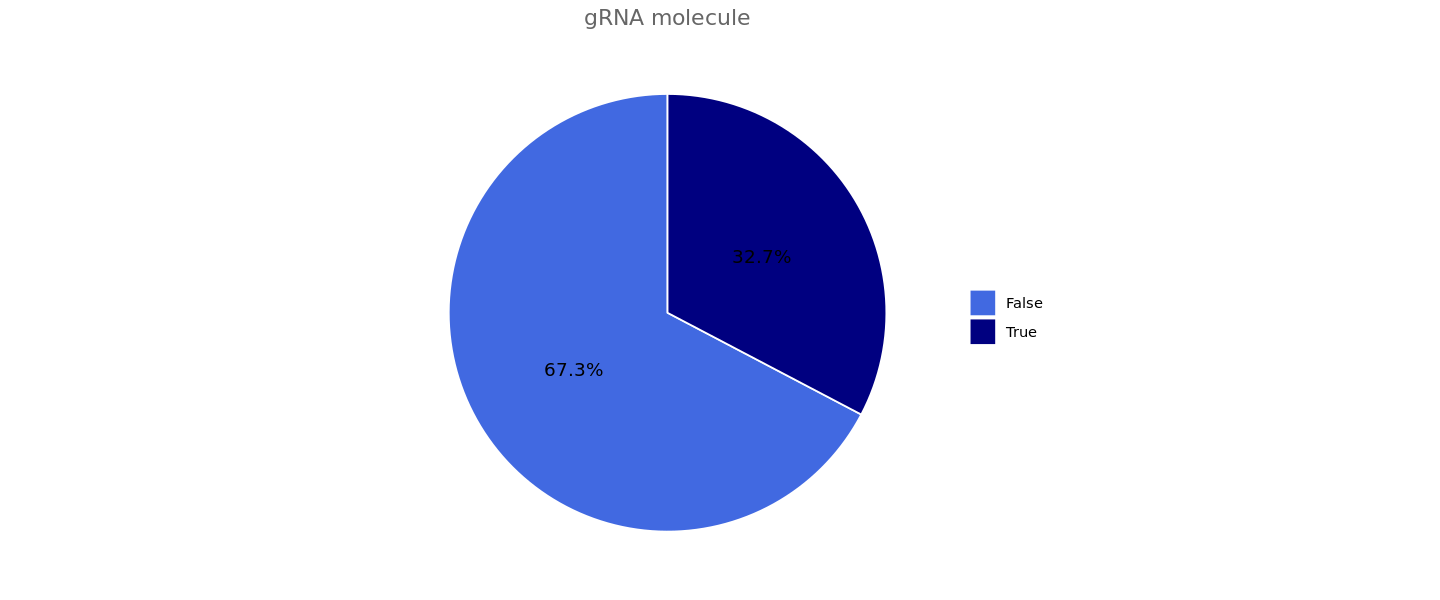

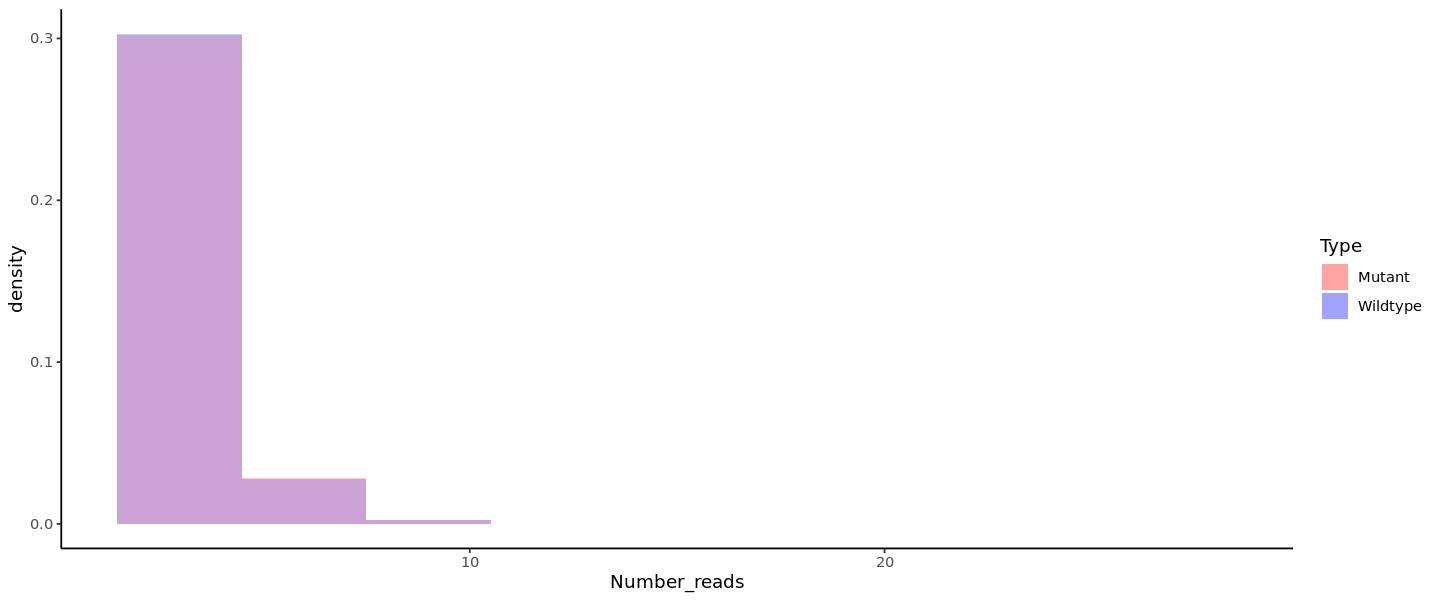

In [83]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


In [84]:
tmp <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False' 
                            & !grepl('TSO',gRNA_UMI_variant$Mutation)),]
tmp <- tmp[!grepl('gRNA:0', tmp$Mutation),]
nrow(tmp) # Real Mutant UMIs
nrow(gRNA_UMI_variant) - nrow(tmp) # wildtype UMIs

[1] 70255

[1] 753369

### source of mutation

In [23]:
#consensus.count.matrix <- source_mutation(input_dir)

### MT.txt

[1] "MT mutation table"

    A     C  D(1) D(10) D(11) D(12) D(13)  D(2)  D(3)  D(4)  D(5)  D(6)  D(7) 
  711   686   512     4     1     2     1   309   134    30    17    11     4 
 D(8)  D(9)     G  I(1)  I(2)  I(3)  I(4)  I(5)     T 
    8     3   777  2208   203    23     9     2   573 
[1] "MT mutation type"

   D    I    S 
1036 2445 2747 
[1] "MT mutation structure"

gRNA Rest  TSO 
3197  452 2579 


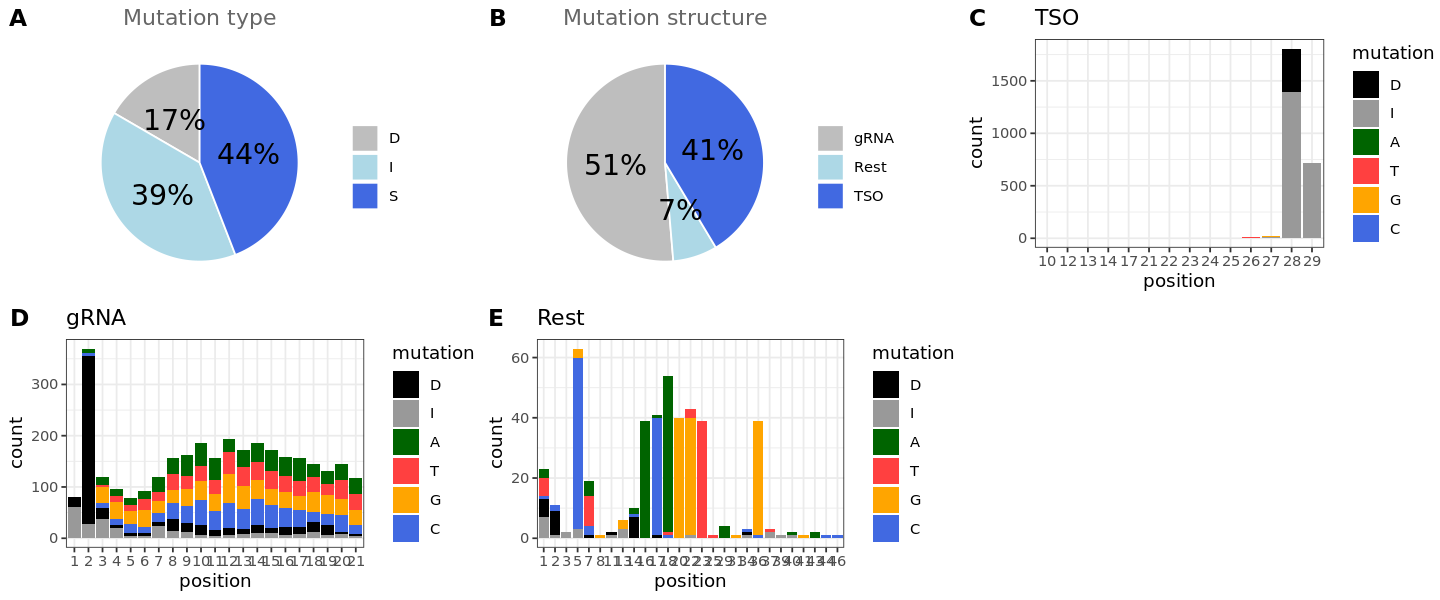

In [82]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [52]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.745   1.000  11.000 

Warning message:
“Removed 50 rows containing non-finite values (stat_count).”


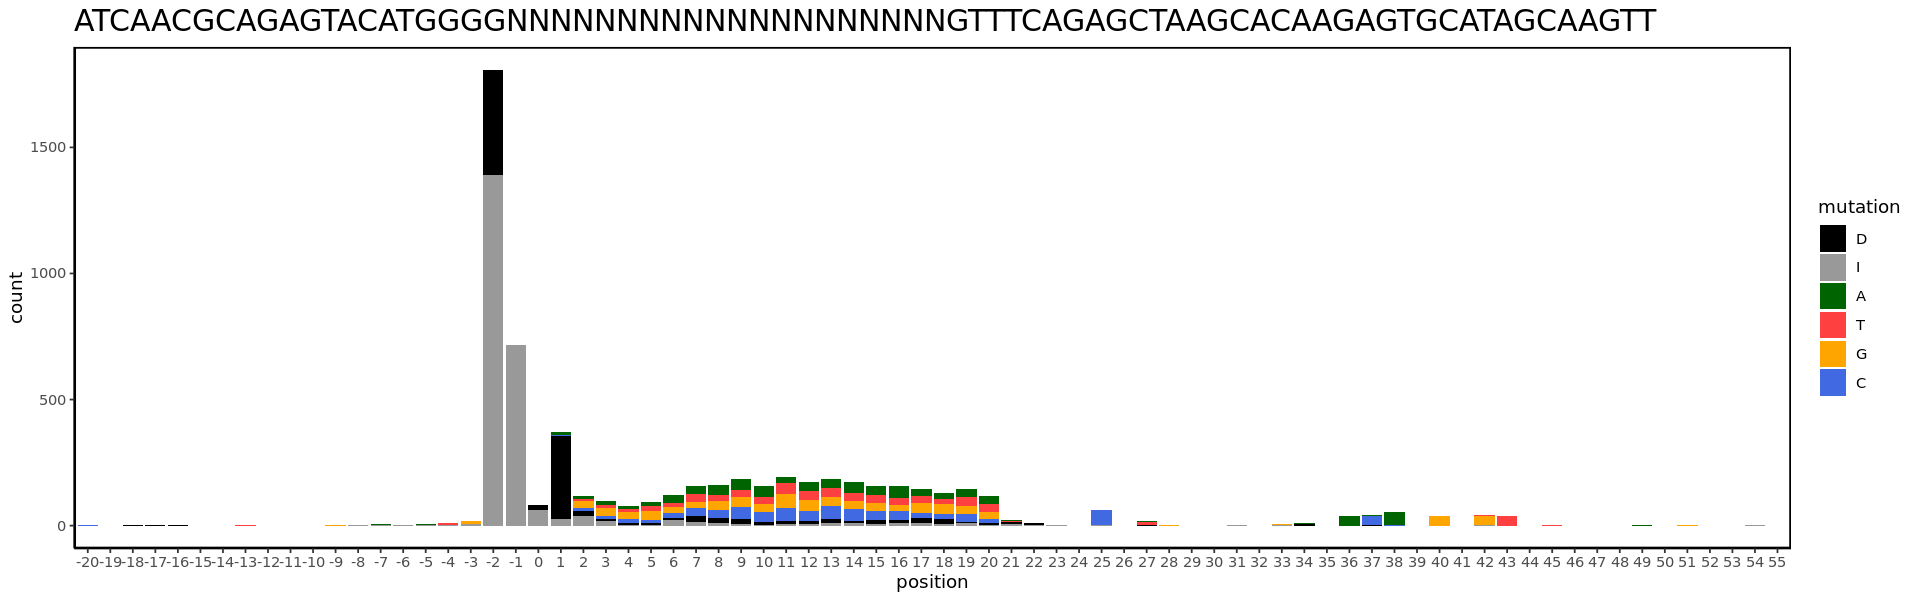

In [66]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')
#dev.off()

In [69]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 50 rows containing non-finite values (stat_count).”


png 
  2

### Cell assignment

Rows: 12659 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


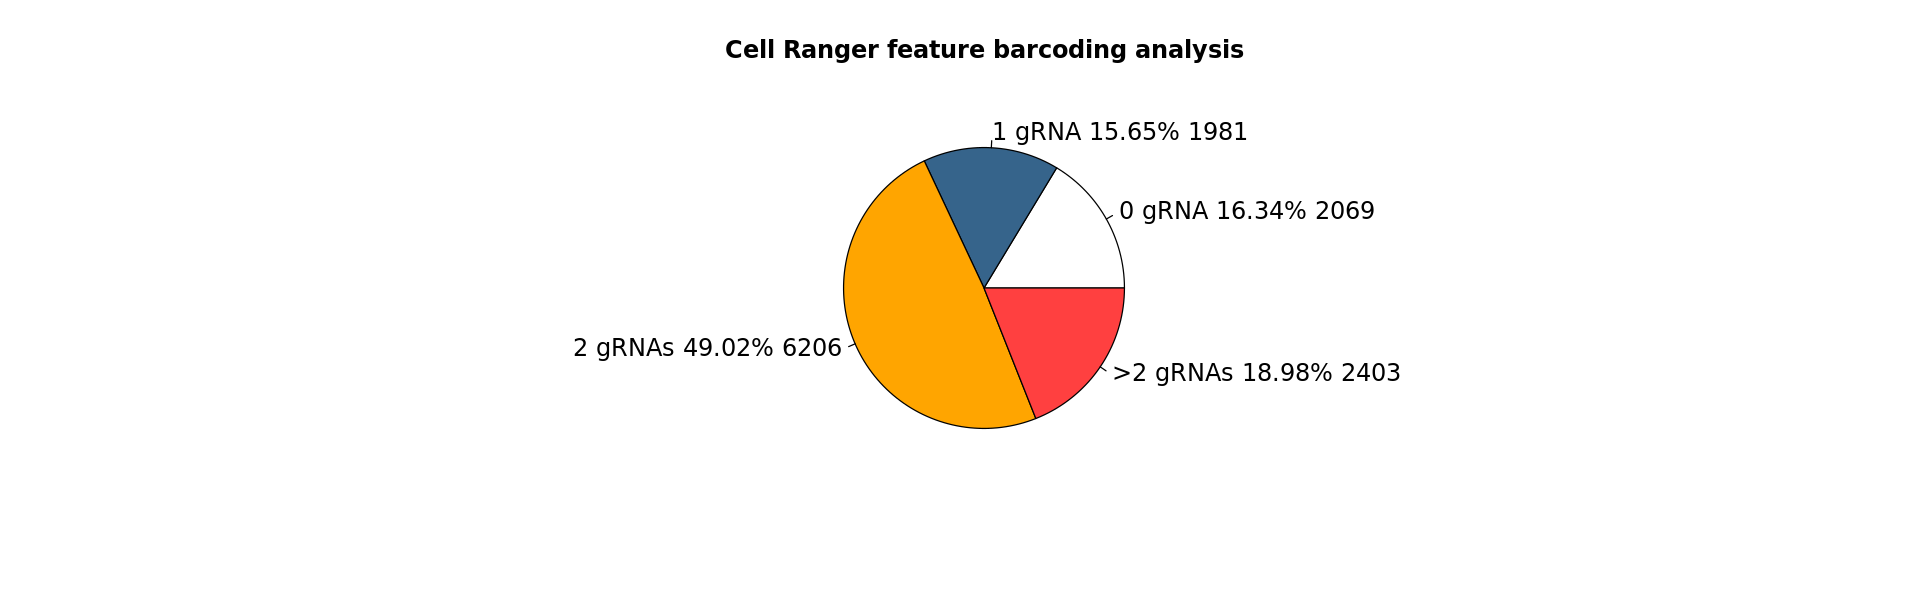

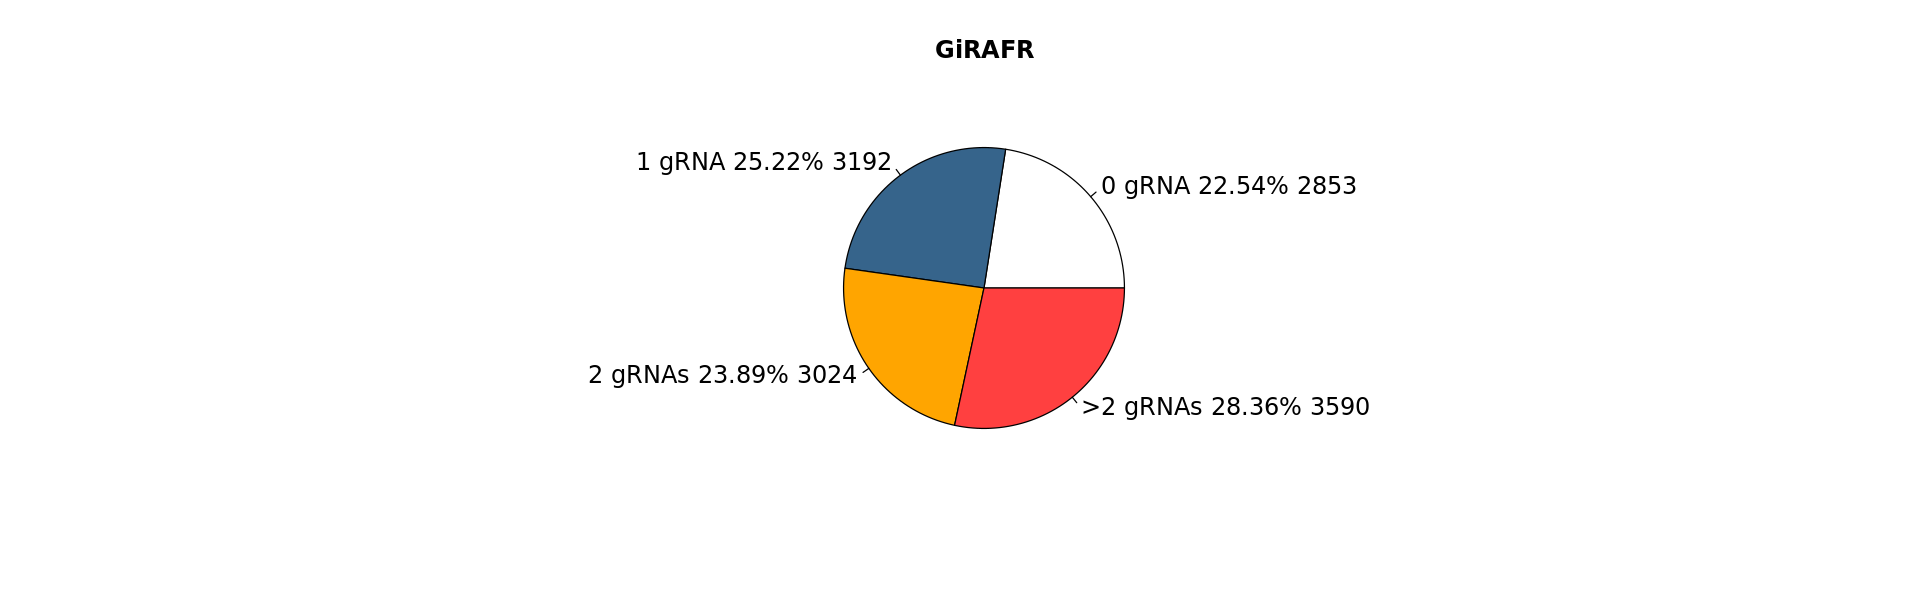

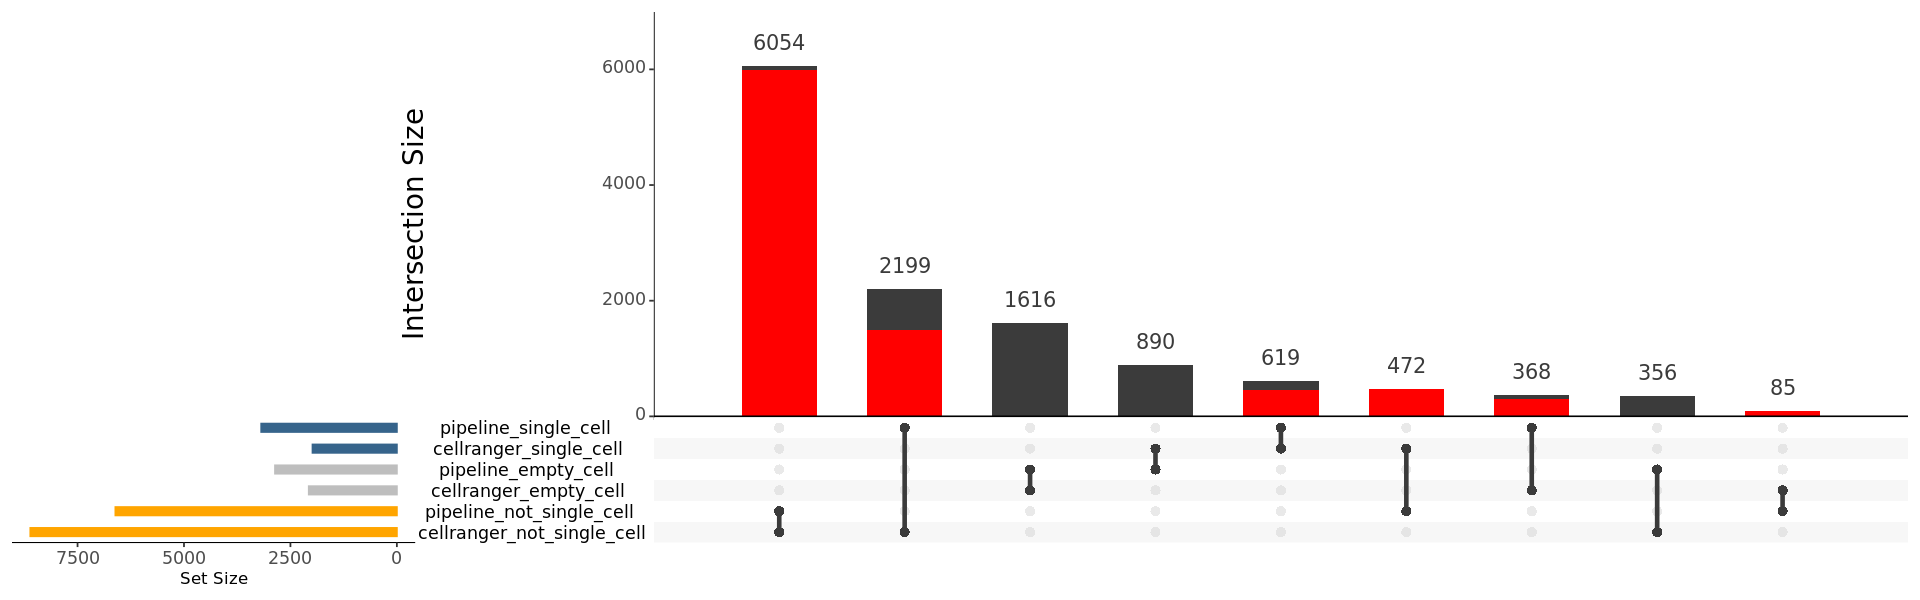

In [20]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Replogle_Cell//feature_barcoding_analysis/KD6_lane_1/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Replogle_Cell//feature_barcoding_analysis/KD6_lane_1//outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


# combine samples MT position

In [76]:
rm(list = ls())
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

input_dir = './GiRAFR_outputs/Replogle_Cell/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Replogle_Cell/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

save_pdf <- paste0('./figures_results/Replogle_Cell/', 'Combined.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)

MT2 <- rbind(MT_sample1, MT_sample2)
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,300))
dev.off()

Warning message:
“Removed 155 rows containing non-finite values (stat_count).”
Warning message:
“Removed 155 rows containing non-finite values (stat_count).”


png 
  2